Model of a generalized Josephson Junction Array

Authors: Cliff Sun, Harshvardhan, Alexey Bezryadin

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.integrate import quad 

In [24]:
def generate_random_numbers(n):
    random_numbers = [random.uniform(0, 1) for _ in range(n)]
    return random_numbers

# Example: Generate 5 random numbers
num_of_junctions = 30
random_numbers = np.array(np.sort(generate_random_numbers(2 * num_of_junctions)))

In [25]:
# arrayOfJunctions = [0, 0.2, 0.4, 0.6, 0.9, 1] # Where the junctions are located; must be even amount of junctions (includes 0 and 1)
# arrayOfJunctions = random_numbers
# arrayOfJunctions = [0, 0.001, 0.25, 0.251, 0.5, 0.501, 0.75, 0.751, 0.999, 1]
# arrayOfJunctions = [0, 0.001, 0.999, 1]
# arrayOfJunctions = [0, 0.1, 0.2, 0.3, 0.5, 0.7, 0.8, 0.9]
# arrayOfJunctions = [0.6, 0.7, 0.8, 1]
# # arrayOfJunctions = np.concatenate([arrayOfJunctions, random_numbers])
# arrayOfJunctions = np.concatenate([random_numbers, arrayOfJunctions])
# arrayOfJunctions = [0, 0.001, 0.97, 1]
# arrayOfJunctions[-1] = 1
# arrayOfJunctions[0] = 0
# arrayOfJunctions = [0, 0.001, 0.2, 0.201, 0.4, 0.401, 0.6, 0.601, 0.8, 0.801, 0.98, 1]
arrayOfJunctions = random_numbers
print(arrayOfJunctions)
print(len(arrayOfJunctions))

[0.05568228 0.06017659 0.08278263 0.10427945 0.11661025 0.13568541
 0.13630032 0.13696972 0.15414577 0.15838493 0.16279936 0.18023382
 0.1923046  0.19547114 0.21538641 0.22737194 0.23861956 0.24357748
 0.25218391 0.25261613 0.30329573 0.32053476 0.35038497 0.36307327
 0.37556648 0.42206619 0.4295787  0.43292484 0.4330506  0.4729873
 0.47734271 0.48065722 0.50794941 0.53570891 0.55370248 0.5653238
 0.57136814 0.57995393 0.61613691 0.62664195 0.63784424 0.63802531
 0.647501   0.6629955  0.67072526 0.6881424  0.69529829 0.70041046
 0.76631163 0.79073778 0.79210793 0.80281925 0.80927864 0.84404589
 0.85699738 0.86693598 0.91536634 0.92818155 0.96602289 0.96859931]
60


In [26]:
def even_arrayOfWidths_noInput(sigma, numOfJunctions, width):
    delta = 4 / (numOfJunctions + 2) * sigma**2
    arrayOfWidths = np.zeros(numOfJunctions)
    arrOfWidthsDiv2 = np.zeros(numOfJunctions//2)
    # Creates the list of the terms generated by the delta, without accounting for the mean
    # NOT THE TRUE STANDARD DEVIATION - Need to account for both positives and minuses, this is just positive
    for i in range(1, numOfJunctions//2 + 1):
        arrOfWidthsDiv2[i - 1] = np.sqrt(i * delta)
    arrayOfWidths = np.concatenate((np.flip(-1 * arrOfWidthsDiv2), arrOfWidthsDiv2))
    minimum = min(arrayOfWidths)
    for i in range (len(arrayOfWidths)):
        arrayOfWidths[i] -= (minimum - width)
    return arrayOfWidths

In [27]:
def EvenArrayOfJunctions(sigma, numOfJunctions, width, arrayJ = []): # Generates an array of junctions given some standard deviation & mean width
    # Necessary Declarations
    junctionCenter = 1/(numOfJunctions - 1) # Declares the middle of the junction assuming zero junction width
    arrOfJunctions =  np.zeros(numOfJunctions * 2)
    arrayOfWidths = []
    if (sigma == 0 and len(arrayJ) != 0):
        return arrayJ
    arrayOfWidths = even_arrayOfWidths_noInput(sigma, numOfJunctions, width)
    # If the user inputted a custom array
    rannum = int(random.randint(0, numOfJunctions - 1))
    arr = np.zeros(numOfJunctions)
    arrOfJunctions[1] = arrayOfWidths[rannum]
    arr[rannum] = 1
    for k in range(2, 2*numOfJunctions - 2,2):
        while(arr[rannum] == 1):
            rannum = int(random.randint(0, numOfJunctions - 1))
        arrOfJunctions[k] = k//2 * junctionCenter - (arrayOfWidths[rannum]/2)
        arrOfJunctions[k + 1] = k//2 * junctionCenter + (arrayOfWidths[rannum]/2)
        arr[rannum] = 1

    for i in range(numOfJunctions):
        if (arr[i] == 0):
            arrOfJunctions[-2] = 1 - arrayOfWidths[i]
            arrOfJunctions[-1] = 1
            break
    
    return arrOfJunctions

In [28]:
# arrayOfJunctions = EvenArrayOfJunctions(0, 10, 0.0001)
# print(arrayOfJunctions)
# arrayOfJunctions = [0, 0.001, 0.2, 0.201, 0.4, 0.401, 0.6, 0.601, 0.8, 0.801, 0.98, 1]
# arrayOfJunctions[-2] = 0.99

In [29]:
critical_currents_density = np.ones(int(len(arrayOfJunctions) / 2)) # all the critical currents for each junction (Critical Currents are assumed to be 1 by default)

criticalCurrents = []

junctionWidths = []

for i in range(len(arrayOfJunctions)//2):
    junctionWidths.append(arrayOfJunctions[2*i+1] - arrayOfJunctions[2*i])

for i in range (len(junctionWidths)):
    criticalCurrents.append(junctionWidths[i] * critical_currents_density[i])

print(criticalCurrents)

print(np.sum(criticalCurrents))

[0.004494310361504827, 0.021496823205939486, 0.019075163118198457, 0.0006693922262187568, 0.004239159511971957, 0.017434456918314578, 0.003166545798438669, 0.011985532382267627, 0.004957914268618802, 0.0004322185950779156, 0.017239038274257656, 0.01268829438833885, 0.046499709513147414, 0.0033461428982537456, 0.0399367082900034, 0.003314509918747488, 0.02775949807726452, 0.01162132587352549, 0.008585781780176993, 0.01050504286053111, 0.00018106701884534893, 0.015494495798867525, 0.017417134616874552, 0.005112176996077578, 0.0244261429513829, 0.010711315929345044, 0.03476724846059265, 0.009938599782526869, 0.01281521406337327, 0.0025764153431886427]
0.4028873792218721


prints out the elements in the junction in a better format

In [30]:
index = 0
while (index < (len(arrayOfJunctions) - 1)):
    if (index == len(arrayOfJunctions) - 2):
        print(str(arrayOfJunctions[index]) + " - " + str(arrayOfJunctions[index + 1]), end = " ")
    else:
        print(str(arrayOfJunctions[index]) + " - " + str(arrayOfJunctions[index + 1]) + ",", end = " ")
    index += 2

0.05568228106955708 - 0.06017659143106191, 0.0827826277542918 - 0.10427945096023128, 0.11661024511787133 - 0.13568540823606978, 0.1363003248607434 - 0.13696971708696215, 0.1541457706138082 - 0.15838493012578014, 0.16279935979680316 - 0.18023381671511773, 0.19230459715204562 - 0.1954711429504843, 0.21538641099033917 - 0.2273719433726068, 0.2386195623975208 - 0.2435774766661396, 0.25218391300440246 - 0.2526161315994804, 0.3032957261289234 - 0.32053476440318107, 0.35038497348396835 - 0.3630732678723072, 0.3755664808796595 - 0.4220661903928069, 0.4295786984429235 - 0.43292484134117726, 0.4330505963725495 - 0.4729873046625529, 0.4773427080749125 - 0.48065721799366, 0.5079494099548436 - 0.5357089080321081, 0.5537024788445729 - 0.5653238047180984, 0.5713681436632001 - 0.5799539254433771, 0.616136911633506 - 0.6266419544940371, 0.6378442414672131 - 0.6380253084860584, 0.6475010002174524 - 0.6629954960163199, 0.6707252611111514 - 0.6881423957280259, 0.6952982878224817 - 0.7004104648185593, 0.76

Parameters for Current -> Magnetic Field, Junction Locations, Critical Currents, Initial Phase Difference

B is the integer value of flux quanta present in the SQUID

In [31]:
def current(B, arrJ, arrC, y): # y is initial phase difference of the whole circuit, B is the magnetic field, arrJ is the location of junctions, arrC is critical current associated with each junction
    curr = 0 # summation of all currents in the entire junction
    limit = int(len(arrJ) / 2) # number of junctions in the SQUID
    numOfSegments = 0
    for n in range(limit):
        numOfSegments = 5 if (arrJ[2 * n + 1] - arrJ[2 * n]) < 0.05 else int(100 * (arrJ[2 * n + 1] - arrJ[2 * n]))
        sizeOfSegment = float((arrJ[2 * n + 1] - arrJ[2 * n]) / numOfSegments)
        for i in range(numOfSegments):
            curr += arrC[n] * np.sin(y + (2 * np.pi * B) * (arrJ[2 * n] + i * sizeOfSegment)) * (1/numOfSegments)

    # phase difference evolves according to 2 * pi * B

    # curr += (critical current element in array)(sin(y + (2 * pi * B) * length)
    return curr

In [32]:
def maxCurrent(B, arrayJ, arrayC): # Spits out the maximum current by varying the gauge invariant phase of the left end (free parameter) gamma
    Y=np.linspace(0, 2*np.pi, 150)
    dummyArray=[]
    for gamma in Y:
        dummyArray.append(current(B, arrayJ, arrayC, gamma))
    return max(dummyArray)

In [33]:
MagField = np.linspace(-10, 10, 10000) # an array of Magnetic Fields ranging from 0 to 100 with 5000 total elements

The 2 lines below is where the useful section of the code is for modeling a SQUID

In [34]:
IMaxPoint = []


In [35]:
length = len(MagField)
for i in range(length):
    IMaxPoint.append(maxCurrent(MagField[i], arrayOfJunctions, criticalCurrents) / np.sum(criticalCurrents)) # This integer represents the number of segments you want to cut each junction up into (the higher the number, the better the approximation)

The 2 lines above is where the useful section of the code is for modeling a SQUID

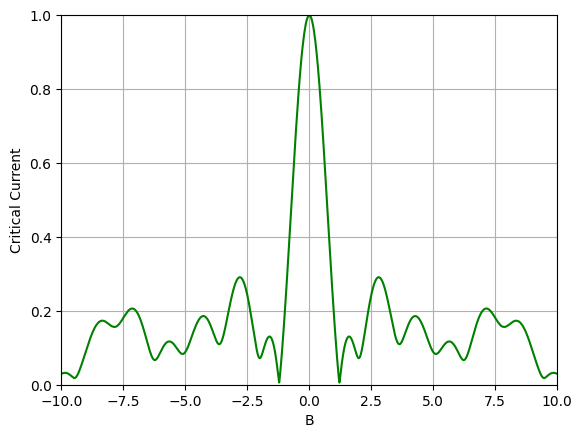

In [36]:
plt.plot(MagField, IMaxPoint, 'g-')
plt.xlabel('B')
plt.ylabel('Critical Current')  
plt.ylim(0,1) 
plt.xlim(-10,10)
plt.grid()            
plt.show()
# plt.savefig('10-random-junctions:B=-5to5.png')

In [37]:
print(max(IMaxPoint))

0.99998833918626


In [38]:
print(min(IMaxPoint))

0.005833095983100647


In [39]:
print(np.mean(junctionWidths))

0.013429579307395738


In [40]:
print(np.std(junctionWidths))

0.01158016918083395


In [41]:
diff = []

for n in range(int(len(IMaxPoint)/2)):
    diff.append(np.abs(IMaxPoint[int(len(MagField)/2)-n] - IMaxPoint[int(len(MagField)/2)+n]))

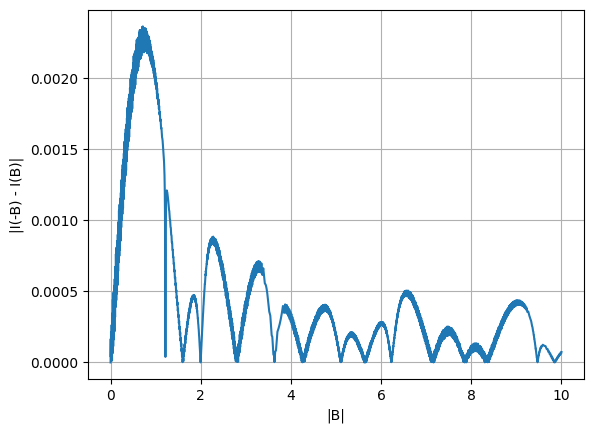

In [42]:
plt.plot(MagField[int(len(MagField)/2):], diff)
plt.xlabel('|B|')
plt.ylabel('|I(-B) - I(B)|')
# plt.ylim(0,1)
plt.grid()
plt.show()

In [43]:
import pandas as pd

In [52]:
data = {'B': MagField, 'I_c': IMaxPoint }
df = pd.DataFrame(data)
csv_path = r"experimental data\model_experimental_data.csv"
df.to_csv(csv_path, index=False)

In [54]:
df = pd.read_csv(r"experimental data\aritifical data\remodified 5.0uV.csv")
compare_ic = np.array(df['I_c'])
diff = compare_ic - IMaxPoint
for i in range(len(diff)):
    diff[i] = diff[i]**2

print(np.sum(diff))

189.58292653110286
